In [2]:
from scipy.spatial import Voronoi,Delaunay
import numpy as np
import matplotlib.pyplot as plt

def tetravol(a,b,c,d):
    '''Calculates the volume of a tetrahedron, given vertices a,b,c and d (triplets)'''
    tetravol=abs(np.dot((a-d),np.cross((b-d),(c-d))))/6
    return tetravol

def vol(vor,p):
    '''Calculate volume of 3d Voronoi cell based on point p. Voronoi diagram is passed in v.'''
    dpoints=[]
    vol=0
    for v in vor.regions[vor.point_region[p]]:
        dpoints.append(list(vor.vertices[v]))
    tri=Delaunay(np.array(dpoints))
    for simplex in tri.simplices:
        vol+=tetravol(np.array(dpoints[simplex[0]]),np.array(dpoints[simplex[1]]),np.array(dpoints[simplex[2]]),np.array(dpoints[simplex[3]]))
    return vol

N = 5
x= [np.random.random() for i in range(N)]
y= [np.random.random() for i in range(N)]
z= [np.random.random() for i in range(N)]
points = np.meshgrid(x,y,z)
print(np.shape(points))
print(np.prod(np.shape(points)[1:]))
vor = Voronoi(np.array(points).reshape(-1,3))
vtot = 0
for i,p in enumerate(vor.points):
    out=False
    for v in vor.regions[vor.point_region[i]]:
        if v<=-1: #a point index of -1 is returned if the vertex is outside the Vornoi diagram, in this application these should be ignorable edge-cases
            out=True
            break
            print(f"vor.regions[vor.point_region[i]: {vor.regions[vor.point_region[i]]}")
        else:
            if not out:
                vtot += vol(vor,i)
#                 print("point "+str(i)+" with coordinates "+str(p)+" has volume "+str(pvol))

print(f"total volume={vtot}")

#oddly, some vertices outside the boundary of the original data are returned, meaning that the total volume can be greater than the volume of the original.


(3, 5, 5, 5)
125
total volume=1022.0618093335642


In [3]:
N = 10
points = np.random.rand(1000,3)
vor = Voronoi(points)
v_tot = 0
for reg in vor.regions:
    if any(x==-1 for x in reg) or not reg:
        continue
    dpoints = []
    for verti in reg:
        dpoints.append(list(vor.vertices[verti]))
    dpoints = np.array(dpoints)
    dela = Delaunay(dpoints)
    vol = 0
    for simplex in dela.simplices:
        vol += tetravol(*dpoints[simplex])
    v_tot += vol
print(f"v_tot: {v_tot}")

v_tot: 70.91276326348617


In [4]:
vor

In [5]:
np.shape(vor.points), np.shape(vor.point_region)

((1000, 3), (1000,))

In [6]:
vor.regions[vor.point_region[0]]

[-1,
 3104,
 3105,
 3106,
 3107,
 3108,
 3109,
 3110,
 3111,
 3112,
 3113,
 3114,
 3115,
 3116,
 3117,
 3118,
 3119,
 3120,
 3121,
 3122,
 4431,
 4433,
 4434,
 4435,
 4437,
 4438,
 4439,
 4440,
 4443,
 4444,
 4446,
 4461,
 4462,
 5505,
 5507,
 5508,
 5509,
 5510,
 6011,
 6012,
 6015,
 6202,
 6203,
 6205]

In [7]:
vor = Voronoi(np.array(points).reshape(-1,3))

In [8]:
vor.point_region[10]

41

In [9]:
vor.regions[vor.point_region[10]]

[-1,
 16,
 25,
 26,
 27,
 33,
 109,
 118,
 226,
 227,
 228,
 349,
 350,
 351,
 673,
 675,
 677,
 678,
 679,
 683,
 720,
 721,
 722,
 723,
 1327,
 1328,
 1329]

In [10]:
len(vor.point_region)

1000

In [11]:
[vor.regions[x] for x in vor.point_region[:]];

### freud

In [12]:
# https://freud.readthedocs.io/en/stable/gettingstarted/examples/examples/Visualizing%203D%20Voronoi%20and%20Voxelization.html?highlight=voronoi
# https://freud.readthedocs.io/en/v1.1.0/examples/module_intros/Voronoi-Voronoi.html

In [3]:
import numpy as np
import freud
import matplotlib
import matplotlib.pyplot as plt

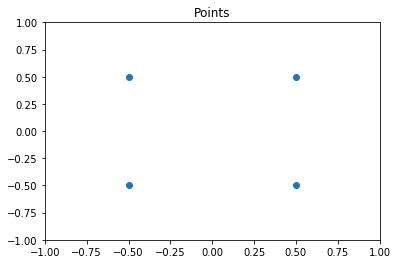

In [4]:
points = np.array([
    [-0.5, -0.5],
    [0.5, -0.5],
    [-0.5, 0.5],
    [0.5, 0.5]])
plt.scatter(points[:,0], points[:,1])
plt.title('Points')
plt.xlim((-1, 1))
plt.ylim((-1, 1))
plt.show()

# We must add a z=0 component to this array for freud
points = np.hstack((points, np.zeros((points.shape[0], 1))))

In [5]:
voro = freud.locality.Voronoi()

In [6]:
box = freud.box.Box(1, 1, 1)

In [7]:
N = 20
x= [np.random.random() for i in range(N)]
y= [np.random.random() for i in range(N)]
z= [np.random.random() for i in range(N)]
positions = np.meshgrid(x, y, z)
positions = np.array(positions).reshape(-1,3)

In [8]:
positions.shape

(8000, 3)

In [ ]:
voro = freud.locality.Voronoi()
voro.compute(system=(box, positions))

In [ ]:
box, positions = freud.data.UnitCell.fcc().generate_system(3, scale=2, sigma_noise=0.05)


In [ ]:
positions.shape

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay

points = np.random.rand(10,2)
points

array([[0.79075125, 0.35563297],
       [0.71483206, 0.58956135],
       [0.26406859, 0.659076  ],
       [0.64922769, 0.69244737],
       [0.26668719, 0.76391899],
       [0.77069106, 0.5373775 ],
       [0.90017924, 0.43680625],
       [0.51304161, 0.9239116 ],
       [0.08082388, 0.73885804],
       [0.44196524, 0.71296666]])

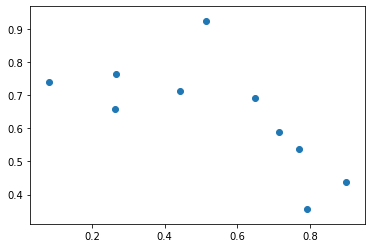

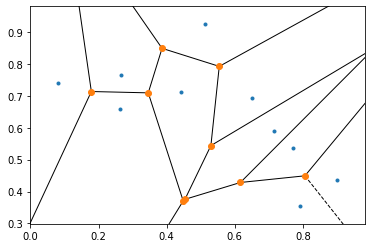

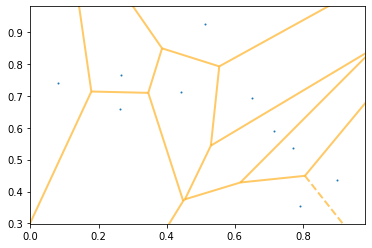

In [15]:
vor = Voronoi(points)
plt.scatter(*points.T)
fig = voronoi_plot_2d(vor)
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',
                line_width=2, line_alpha=0.6, point_size=2)

In [16]:
vor.regions, np.shape([x for x in vor.regions if len(x)]), np.shape(points)

([[],
  [3, 1, 0, -1, 2],
  [7, 5, 4, 6],
  [6, 0, -1, 4],
  [7, 1, 0, 6],
  [9, 2, -1, 8],
  [13, 11, 10, 12],
  [11, 9, 2, 3, 10],
  [12, 5, 7, 1, 3, 10],
  [13, 8, 9, 11],
  [13, 8, -1, 4, 5, 12]],
 (10,),
 (10, 2))

In [17]:
vor.vertices[vor.regions[1]]

array([[0.55448614, 0.79250036],
       [0.38649474, 0.84910385],
       [0.10138658, 1.28810945],
       [0.61656621, 0.42838652],
       [1.68356001, 1.45681099]])

(0, 1)

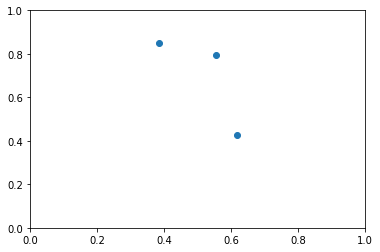

In [18]:
plt.scatter(*vor.vertices[vor.regions[1]].T)
plt.xlim([0,1])
plt.ylim([0,1])

In [19]:
vor.vertices[vor.regions[1]]

array([[0.55448614, 0.79250036],
       [0.38649474, 0.84910385],
       [0.10138658, 1.28810945],
       [0.61656621, 0.42838652],
       [1.68356001, 1.45681099]])

In [20]:
dpoints = []
for v in vor.regions[3]:
    dpoints.append(list(vor.vertices[v]))
dpoints = np.array(dpoints)

In [21]:
tri = Delaunay(np.array(dpoints))

In [22]:
tri.simplices

array([[2, 0, 3],
       [0, 1, 3],
       [1, 0, 2]], dtype=int32)

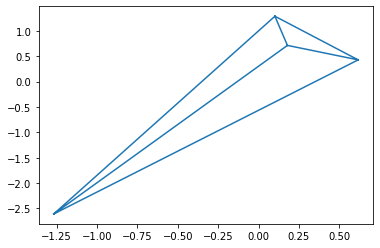

In [23]:
plt.triplot(dpoints[:,0], dpoints[:,1], tri.simplices)

In [24]:
def vol_triangle(x1, x2, x3):
    def length(x1, x2):
        return np.sqrt((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)
    a = length(x1, x2)
    b = length(x1, x3)
    c = length(x2, x3)
    s = 1./2.*(a + b + c)
    return np.sqrt(s*(s-a)*(s-b)*(s-c))

In [25]:
dpoints

array([[ 0.17884283,  0.71365883],
       [ 0.10138658,  1.28810945],
       [ 0.61656621,  0.42838652],
       [-1.26701047, -2.60720084]])

In [26]:
tri.simplices

array([[2, 0, 3],
       [0, 1, 3],
       [1, 0, 2]], dtype=int32)

In [27]:
vol_triangle(*dpoints[tri.simplices[0]]) + vol_triangle(*dpoints[tri.simplices[1]])

1.4769362499325611

In [56]:
points = np.random.rand(1_000_000,2)

v_tot: 3.0685974708540993
skip: 10, incl: 11


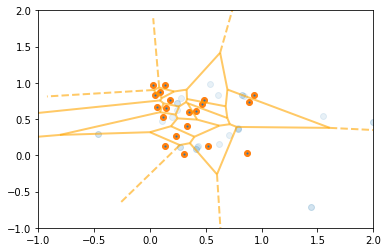

In [77]:
points = np.random.rand(20,2)
def get_tot_vol(points, verbose=False):
    vor = Voronoi(points)
    v_tot = 0
    skip = 0
    incl = 0
    skipped = []
    for reg in vor.regions:
        if any(x==-1 for x in reg) or not len(reg):
            if verbose:
                print(f"skipped: {reg}")
                for v in reg:
                    if v != -1:
                        skipped.append(list(vor.vertices[v]))
                        print(f"point: {list(vor.vertices[v])}")
            skip += 1
            continue
        incl += 1
        dpoints = []
        for v in reg:
            dpoints.append(list(vor.vertices[v]))
        dpoints = np.array(dpoints)
        tri = Delaunay(np.array(dpoints))
        for simple in tri.simplices:
            v_tot += vol_triangle(*dpoints[simple])
    print(f"v_tot: {v_tot}") 
    return v_tot, vor
v_tot, vor = get_tot_vol(points)
if verbose:
    print(f"skip: {skip}, incl: {incl}")
    fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',
                    line_width=2, line_alpha=0.6, point_size=2)
    plt.scatter(*np.array(skipped).T, alpha=0.1)
    plt.scatter(*points.T)
    plt.xlim([-1,2])
    plt.ylim([-1,2]);

In [ ]:
def get_boundary_point():
    

In [ ]:
vor.regions

In [ ]:
for reg in vor.regions:
    if any(x==-1 for x in reg) or not len(reg):
        continue
    dpoints = []
    for v in reg:
        dpoints.append(list(vor.vertices[v]))
    dpoints = np.array(dpoints)

    tri = Delaunay(np.array(dpoints))
    print(dpoints)
    plt.triplot(dpoints[:,0], dpoints[:,1], tri.simplices)

[-1, 1]
[[0.85756258 0.97574432]
 [0.68816973 0.93737085]]
[14  0]
[array([[0.85756258, 0.97574432],
       [0.95656754, 0.7988712 ]])]
(36, 2)
(36, 2)
radius: 1.9554384723183875
radius: 1.9554384723183875
radius: 1.9554384723183875
radius: 1.9554384723183875
radius: 1.9554384723183875
radius: 1.9554384723183875
0.03534619898969346 1.056567544356333 -0.09603218784165515 1.0816870483175387


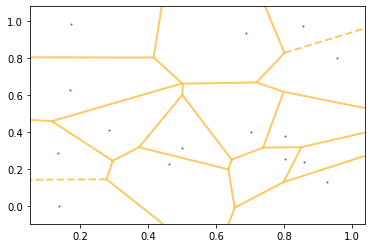

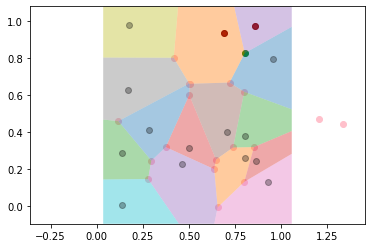

v_tot: 1.202712022814663


In [52]:
# coding=utf-8
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, Delaunay, voronoi_plot_2d
from shapely.geometry import Polygon

def vol_triangle(x1, x2, x3):
    def length(x1, x2):
        return np.sqrt((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)
    a = length(x1, x2)
    b = length(x1, x3)
    c = length(x2, x3)
    s = 1./2.*(a + b + c)
    return np.sqrt(s*(s-a)*(s-b)*(s-c))

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.
    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.
    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.
    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()*2

    # Construct a map containing all ridges for a given point
    print(vor.ridge_vertices[0])
    print(vor.points[vor.ridge_vertices[0]])
    print(vor.ridge_points[0])
    print([vor.points[vor.ridge_points[0]]])
    print(np.shape(vor.ridge_vertices))
    print(np.shape(vor.ridge_points))
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]
        print(f"radius: {radius}")
        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

# make up data points
# np.random.seed(1234)
points = np.random.rand(15, 2)

# compute Voronoi tesselation
vor = Voronoi(points)
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',
                line_width=2, line_alpha=0.6, point_size=2)
fig = plt.figure()
# plot
regions, vertices = voronoi_finite_polygons_2d(vor)

min_x = vor.min_bound[0] - 0.1
max_x = vor.max_bound[0] + 0.1
min_y = vor.min_bound[1] - 0.1
max_y = vor.max_bound[1] + 0.1
# min_x = 0
# max_x = 1
# min_y = 0
# max_y = 1
print(min_x, max_x, min_y, max_y)
mins = np.tile((min_x, min_y), (vertices.shape[0], 1))
bounded_vertices = np.max((vertices, mins), axis=0)
maxs = np.tile((max_x, max_y), (vertices.shape[0], 1))
bounded_vertices = np.min((bounded_vertices, maxs), axis=0)



box = Polygon([[min_x, min_y], [min_x, max_y], [max_x, max_y], [max_x, min_y]])

v_tot = 0
# colorize
for region in regions:
    polygon = vertices[region]
    # Clipping polygon
    poly = Polygon(polygon)
    poly = poly.intersection(box)
    polygon = [p for p in poly.exterior.coords]
    plt.fill(*zip(*polygon), alpha=0.4)
    dpoints = []
    for pol in polygon:
        dpoints.append(list(pol))
    dpoints = np.array(dpoints)
    tri = Delaunay(np.array(dpoints))
    for simple in tri.simplices:
        v_tot += vol_triangle(*dpoints[simple])
plt.plot(points[:, 0], points[:, 1], 'ko', alpha=0.3)
plt.axis('equal')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
plt.scatter(*vertices.T, color="pink")
plt.scatter(*vor.vertices[vor.ridge_vertices[2]].T, color="green")
plt.scatter(*vor.points[vor.ridge_points[2]].T, color="red")
plt.savefig('voro.png')
plt.show()
print(f"v_tot: {v_tot}")


In [114]:
def vol_tetra(a, b, c, d):
    '''Calculates the volume of a tetrahedron, given vertices a,b,c and d (triplets)'''
    tetravol = abs(np.dot((a-d),np.cross((b-d),(c-d))))/6
    return tetravol

In [53]:
# coding=utf-m8
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from shapely.geometry import Polygon

def voronoi_finite_polygons_3d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 3D diagram to finite
    regions.
    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.
    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.
    """

    if vor.points.shape[1] != 3:
        raise ValueError("Requires 3D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()
    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()*2

    # Construct a map containing all ridges for a given point
    all_ridges = {}
#     print(vor.ridge_vertices[0])
#     print(np.shape(vor.ridge_vertices))
#     print(vor.ridge_vertices)
#     print(np.shape(vor.ridge_points))
#     print(vor.ridge_points)
    print(vor.ridge_points)
    for (p1, p2), (vs) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, *vs))
        all_ridges.setdefault(p2, []).append((p1, *vs))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]
        print(f"current vertices: {vertices}")
        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        # assuming single missing vortex

        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]
        print(ridges)
        for p2, *v in ridges:
            if len([v for v in vertices if v<0]) != 1:
                raise Exception(f"Assuming single missing vortex here," 
                                "but found {len([v for v in vertices if v<0])}")

#             if v2 < 0:
#                 v1, v2 = v2, v1
#             if v1 >= 0:
#                 # finite ridge: already in the region
#                 continue

#             # Compute the missing endpoint of an infinite ridge

            # need to determine correct wall it will hit!

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

            # sort region counterclockwise
            vs = np.asarray([new_vertices[v] for v in new_region])
            c = vs.mean(axis=0)
            angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
            new_region = np.array(new_region)[np.argsort(angles)]

            # finish
            new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

# make up data points
# np.random.seed(1234)
points = np.random.rand(15, 3)

# compute Voronoi tesselation
vor = Voronoi(points)

# plot
regions, vertices = voronoi_finite_polygons_3d(vor)

min_x = vor.min_bound[0] - 0.1
max_x = vor.max_bound[0] + 0.1
min_y = vor.min_bound[1] - 0.1
max_y = vor.max_bound[1] + 0.1
min_x = 0
max_x = 1
min_y = 0
max_y = 1
print(min_x, max_x, min_y, max_y)
mins = np.tile((min_x, min_y), (vertices.shape[0], 1))
bounded_vertices = np.max((vertices, mins), axis=0)
maxs = np.tile((max_x, max_y), (vertices.shape[0], 1))
bounded_vertices = np.min((bounded_vertices, maxs), axis=0)



box = Polygon([[min_x, min_y], [min_x, max_y], [max_x, max_y], [max_x, min_y]])

v_tot = 0
# colorize
for region in regions:
    polygon = vertices[region]
    # Clipping polygon
    poly = Polygon(polygon)
    poly = poly.intersection(box)
    polygon = [p for p in poly.exterior.coords]
    plt.fill(*zip(*polygon), alpha=0.4)
    dpoints = []
    for pol in polygon:
        dpoints.append(list(pol))
    dpoints = np.array(dpoints)
    tri = Delaunay(np.array(dpoints))
    for simple in tri.simplices:
        v_tot += vol_tetra(*dpoints[simple])
plt.plot(points[:, 0], points[:, 1], 'ko')
plt.axis('equal')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.savefig('voro.png')
plt.show()
print(f"v_tot: {v_tot}")


[[ 1  7]
 [ 1 14]
 [ 1  4]
 [ 1  6]
 [10 14]
 [10  7]
 [10  0]
 [10  6]
 [10  9]
 [10  8]
 [10 12]
 [10 13]
 [14 13]
 [14  8]
 [14  7]
 [14  0]
 [14  4]
 [14  6]
 [14 11]
 [ 8 13]
 [ 8  6]
 [ 8  9]
 [13 12]
 [13  2]
 [13  9]
 [13  4]
 [13  6]
 [13 11]
 [ 5  4]
 [ 5  2]
 [ 5  3]
 [ 5  6]
 [ 5 12]
 [ 5  9]
 [ 5  0]
 [ 5 11]
 [ 5  7]
 [ 4  3]
 [ 4  7]
 [ 4  6]
 [ 4 11]
 [ 4  2]
 [ 2 12]
 [ 2  9]
 [ 2 11]
 [ 2  6]
 [ 3  7]
 [ 3  0]
 [ 3  6]
 [ 6  7]
 [ 6  9]
 [ 6 11]
 [ 6  0]
 [12  0]
 [12  9]
 [ 9 11]
 [ 9  0]
 [ 0  7]]
current vertices: [-1, 15, 16, 18, 19, 22, 29, 33, 34, 35, 37]
[(10, 15, 16, 18, 22, -1, 19), (14, -1, 19, 15), (5, 29, 34, 33, 35, 37), (3, -1, 33, 35), (6, 16, 37, 29, 18), (12, -1, 33, 34, 22), (9, 18, 29, 34, 22), (7, -1, 35, 37, 16, 15)]


ValueError: shapes (3,) and (2,) not aligned: 3 (dim 0) != 2 (dim 0)

In [50]:
np.cross([1,0,0],[0,1,0])

array([0, 0, 1])